<a href="https://colab.research.google.com/github/Rajeshgit-R/mall_customer_segmentation_project/blob/main/mall_customer_segmentation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Importing the libraries</b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<b>Load the dataset</b>

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Data/Mall_Customers.csv")

<b>check the rows in the datsset</b>

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<b>display the inforamtaion of dataset</b>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<b>check the null values</b>

In [5]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<b>check the satistical information</b>

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


<b>check the shape(rows and columns) of dataset</b>

In [7]:
data.shape

(200, 5)

In [8]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<b>split the features values</b>

In [9]:
X=data[["Annual Income (k$)","Spending Score (1-100)"]]

In [10]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<b>Fit the Machine learning model</b>

In [11]:
from sklearn.cluster import KMeans

In [12]:
k_means=KMeans(n_clusters=5)

In [13]:
k_means.fit(X)

KMeans(n_clusters=5)

In [ ]:
k_means.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [14]:
wcss=[] # with in cluster sum of squred metric(wcss)
for i in range(1,11):
  k_means=KMeans(n_clusters=i)
  k_means.fit(X)
  wcss.append(k_means.inertia_)

In [15]:
wcss

[269981.28000000014,
 184609.98434090626,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 37558.92202302528,
 32243.894362159568,
 31033.013074888073,
 23364.670951459873,
 19636.75396489815]

<b>Find the optimize cluster using Elbow method</b>

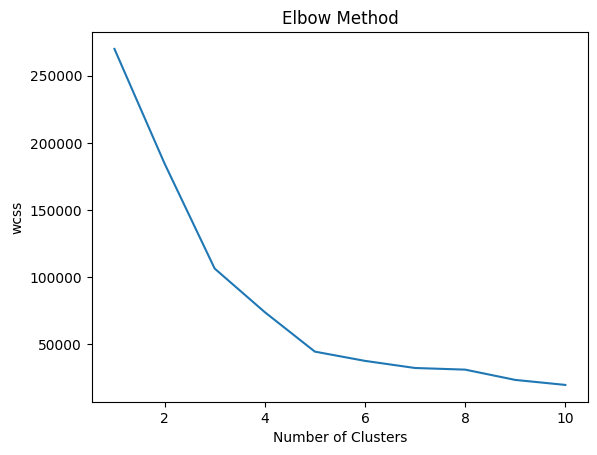

In [16]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [17]:
k_means=KMeans(n_clusters=5,random_state=42)
y_means=k_means.fit_predict(X)

In [18]:
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

<b>customer segmentation process using scatter plot</b>

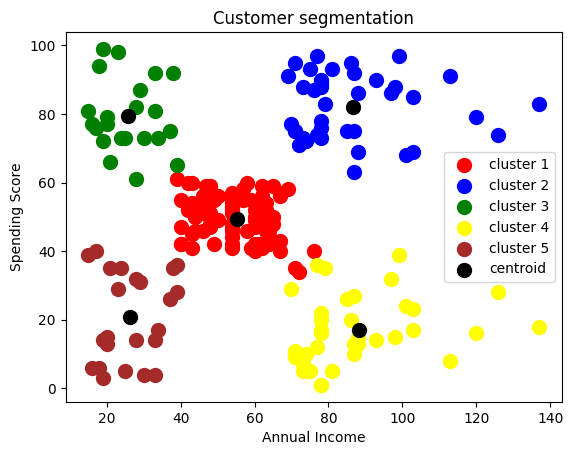

In [19]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c="red",label="cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c="blue",label="cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c="green",label="cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c="yellow",label="cluster 4")
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=100,c="brown",label="cluster 5")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="black",label="centroid")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer segmentation")
plt.legend()
plt.show()

In [20]:
k_means.predict([[15,39]])

array([4], dtype=int32)

In [ ]:
def customer_segmentation(Annual_Income,Spending_Score):
  if k_means.predict([[Annual_Income,Spending_Score]])==0:
    print(f"culster {k_means.predict([[Annual_Income,Spending_Score]])} : medium annual income and medium annual spending")
  elif k_means.predict([[Annual_Income,Spending_Score]])==1:
    print(f"cluster {k_means.predict([[Annual_Income,Spending_Score]])} : high annual income and high annual spending")
  elif k_means.predict([[Annual_Income,Spending_Score]])==2:
    print(f"cluster {k_means.predict([[Annual_Income,Spending_Score]])} : low annual income and high annual spending")
  elif k_means.predict([[Annual_Income,Spending_Score]])==3:
    print(f"cluster {k_means.predict([[Annual_Income,Spending_Score]])} : high annual income and low annual spending")
  else:
    print(f"cluster {k_means.predict([[Annual_Income,Spending_Score]])} : low annual income and low annual spending ")

customer_segmentation(15,37)


cluster [4] : low annual income and low annual spending 


<b>Save the model</b>

In [21]:
import joblib

In [22]:
joblib.dump(k_means,"customer_segmentation")


['customer_segmentation']

In [23]:
model=joblib.load("customer_segmentation")

In [24]:
model.predict([[15,39]])


array([4], dtype=int32)

In [25]:
model.predict([[30,87]])

array([2], dtype=int32)

In [26]:
model.predict([[15,81]])

array([2], dtype=int32)